In [5]:
import pybaseball as pyb
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Gathering Player Data


c:\Users\cates\Anaconda3\lib\site-packages\pybaseball\utils.py:295: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.StringIO(data.text))
c:\Users\cates\Anaconda3\lib\site-packages\pybaseball\plotting.py:135: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_data = sub_data[sub_data['events'].notna()][sub_data['hc_x'].notna()][sub_data['hc_y'].notna()]


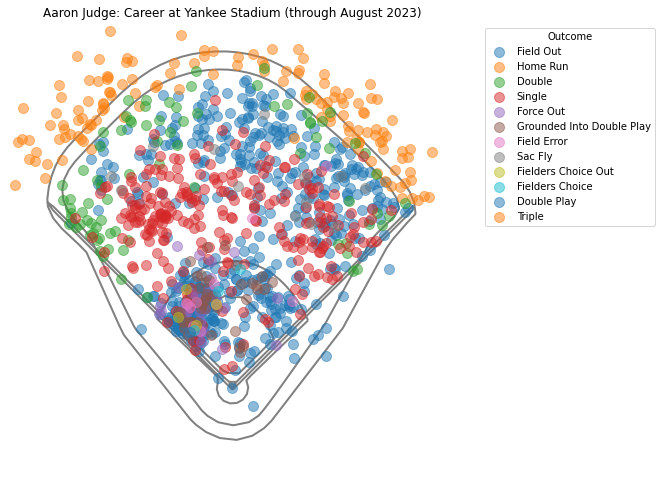

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1]
[[2.41984365 1.41433295]]
[-3.62760988]
0.8745247148288974


In [6]:
#lookup aaron judge key value from db
judge = pyb.playerid_lookup('judge','aaron')

#call 2023 batter data for judge's key
dt = pyb.statcast_batter(start_dt='2016-08-14', end_dt='2023-08-08', player_id = 592450)

#plot the overview for fun
yankee_stadium_data = dt[dt['home_team'] == 'NYY']
pyb.spraychart(yankee_stadium_data,'yankees',title='Aaron Judge: Career at Yankee Stadium (through August 2023)')

#define list of events to exclude
in_play = ['field_out','single','home_run','double','grounded_into_double_play','sac_fly','fielders_choice','force_out','field_error']

#filter for yankee stadium and plate appearances with contact
dt = dt[['launch_speed','launch_angle','events','home_team']]
dt = dt.loc[(dt['home_team'] == 'NYY') & dt['events'].isin(in_play)]
dt['home_run_flag'] =  np.where(dt['events'] == 'home_run', 1, 0)

#drop NaN rows
dt.dropna(axis=0, how='any', inplace=True)

#define features and labels for model
features = dt[['launch_speed','launch_angle']]
labels = dt['home_run_flag']

#scale features, split data, fit model
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)
x_train, x_test, y_train, y_test = train_test_split(features,labels, test_size=0.25)
model = LogisticRegression()
model.fit(x_train,y_train)

#test model and check probabilities
print(model.predict(x_test))
print(model.coef_)
print(model.intercept_)
print(model.score(x_test,y_test))

In [7]:
#create function to test model on different players
def test_model(player_first_name, player_last_name, start_date, end_date):

    #lookup playerid
    name = pyb.playerid_lookup(player_last_name,player_first_name)

    id = name['key_mlbam'].iloc[0]

    #call 2023 batter data for that key
    fdt = pyb.statcast_batter(start_dt=start_date, end_dt=end_date, player_id = id)

    fdt = fdt[['launch_speed','launch_angle','events','home_team']]
    fdt = fdt.loc[(fdt['home_team'] == 'NYY') & fdt['events'].isin(in_play)]
    fdt['home_run_flag'] =  np.where(fdt['events'] == 'home_run', 1, 0)
    fdt.dropna(axis=0, how='any', inplace=True)

    x = fdt[['launch_speed','launch_angle']]
    y = fdt['home_run_flag']

    scaler.fit(x)
    x = scaler.transform(x)
    print('Results for ' + str(player_first_name) + ' ' + str(player_last_name) + ':' + str(model.score(x, y)))

In [8]:
test_model('jose', 'altuve', '2016-08-14', '2023-08-08')

Gathering Player Data


c:\Users\cates\Anaconda3\lib\site-packages\pybaseball\utils.py:295: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.StringIO(data.text))


Results for jose altuve:0.9705882352941176
